In [4]:
import requests
import json
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb"
sc_counties_url = url + "/" + "State_County/MapServer/1/query?where=STATE='45'&outFields=NAME,COUNTY&f=geojson"
md_counties_url = url + "/" + "State_County/MapServer/1/query?where=STATE='24'&outFields=NAME,COUNTY&f=geojson"


sc_SLDL_url = url + "/" + "Legislative/MapServer/2/query?where=STATE='45'&outFields=NAME&f=geojson"
md_SLDL_url = url + "/" + "Legislative/MapServer/2/query?where=STATE='24'&outFields=NAME&f=geojson"


sc_SLDU_url = url + "/" + "Legislative/MapServer/1/query?where=STATE='45'&outFields=NAME&f=geojson"
md_SLDU_url = url + "/" + "Legislative/MapServer/1/query?where=STATE='24'&outFields=NAME&f=geojson"

sc_CD_url = url + "/" + "Legislative/MapServer/0/query?where=STATE='45'&outFields=NAME&f=geojson"
md_CD_url = url + "/" + "Legislative/MapServer/0/query?where=STATE='24'&outFields=NAME&f=geojson"

sc_state_url = url + "/" + "State_County/MapServer/0/query?where=STATE='45'&outFields=NAME&f=geojson"
md_state_url = url + "/" + "State_County/MapServer/0/query?where=STATE='24'&outFields=NAME&f=geojson"

In [17]:
response = requests.get(sc_CD_url)
output_file  = "south_carolina_cd.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("SC SLDL:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

SC SLDL:
- Congressional District 1
- Congressional District 2
- Congressional District 3
- Congressional District 4
- Congressional District 5
- Congressional District 6
- Congressional District 7
GeoJSON data with county boundaries successfully saved to south_carolina_cd.geojson


In [18]:
response = requests.get(md_CD_url)
output_file  = "maryland_cd.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("MD CD:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

MD CD:
- Congressional District 1
- Congressional District 2
- Congressional District 3
- Congressional District 4
- Congressional District 5
- Congressional District 6
- Congressional District 7
- Congressional District 8
GeoJSON data with county boundaries successfully saved to maryland_cd.geojson


In [2]:
response = requests.get(md_state_url)
output_file  = "maryland_state.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("MD State:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

MD State:
- Maryland
GeoJSON data with county boundaries successfully saved to maryland_state.geojson


In [3]:
response = requests.get(sc_state_url)
output_file  = "south_carolina_state.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("SC State:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

SC State:
- South Carolina
GeoJSON data with county boundaries successfully saved to south_carolina_state.geojson


In [2]:
sc_precincts_gdf = gpd.read_file('raw/precincts/sc_2022_gen_prec/sc_2022_gen_prec_no_splits/sc_2022_gen_prec_no_splits.shp')

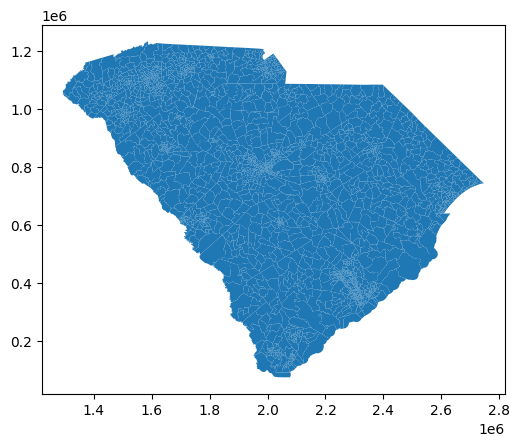

In [5]:
sc_precincts_gdf.plot()
plt.show()

In [8]:
print(sc_precincts_gdf.columns.values)

['UNIQUE_ID' 'COUNTYFP' 'County' 'Precinct' 'Prec_Code' 'G22A1NO'
 'G22A1YES' 'G22A2NO' 'G22A2YES' 'G22AGRCNEL' 'G22AGRGEDM' 'G22AGROWRI'
 'G22AGRRWEA' 'G22ATGOWRI' 'G22ATGRWIL' 'G22COMOWRI' 'G22COMRECK'
 'G22GOVDCUN' 'G22GOVLREE' 'G22GOVOWRI' 'G22GOVRMCM' 'G22SOSDBUT'
 'G22SOSOWRI' 'G22SOSRHAM' 'G22SUPAELL' 'G22SUPDELL' 'G22SUPGMIC'
 'G22SUPOWRI' 'G22SUPRWEA' 'G22TREAWOR' 'G22TREOWRI' 'G22TRERLOF'
 'G22USSDMAT' 'G22USSOWRI' 'G22USSRSCO' 'GCON01AODD' 'GCON01DAND'
 'GCON01OWRI' 'GCON01RMAC' 'GCON02DLAR' 'GCON02OWRI' 'GCON02RWIL'
 'GCON03OWRI' 'GCON03RDUN' 'GCON04OWRI' 'GCON04RTIM' 'GCON05DHUN'
 'GCON05GGAI' 'GCON05OWRI' 'GCON05RNOR' 'GCON06DCLY' 'GCON06OWRI'
 'GCON06RBUC' 'GCON07DSCO' 'GCON07OWRI' 'GCON07RFRY' 'GSL001OWRI'
 'GSL001RWHI' 'GSL002OWRI' 'GSL002RSAN' 'GSL003OWRI' 'GSL003RCAR'
 'GSL004OWRI' 'GSL004RHIO' 'GSL005OWRI' 'GSL005RCOL' 'GSL006OWRI'
 'GSL006RCRO' 'GSL007DSAL' 'GSL007OWRI' 'GSL007RWES' 'GSL008ATOD'
 'GSL008DMAC' 'GSL008OWRI' 'GSL008RCHA' 'GSL009DPOL' 'GSL009OWRI'
 'GS

In [9]:
sc_precincts_gdf.to_file("states/south_carolina/geodata/south_carolina_precincts.geojson", driver="GeoJSON")

In [ ]:
md_precincts_gdf = gpd.read_file('raw/precincts/sc_2022_gen_prec/sc_2022_gen_prec_no_splits/sc_2022_gen_prec_no_splits.shp')